<a href="https://colab.research.google.com/github/KaiaX926/P-MNIST-milestone/blob/main/5241_project_0425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Deep learning

In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
import time
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import trange
from time import sleep
import seaborn as sns
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
def errorrate(y_pred, y_true):
    error = sum([y_pred[i]!=y_true[i] for i in range(len(y_true))])
    return error/len(y_true)

def CrossEntropy(y_pred, y_true):
    if y_true == 1:
      return -np.log(y_pred)
    else:
      return -np.log(1 - y_pred)
    return mean_bce_loss

In [4]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)#.to(device)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)#.to(device)
train_subset, val_subset = torch.utils.data.random_split(
        train_data, [50000, 10000], generator=torch.Generator().manual_seed(1))

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size,
    num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


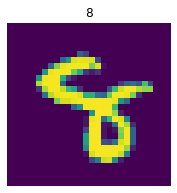

In [5]:
X_test = test_data . test_data . numpy ()
Y_test = test_data . test_labels . numpy ()
image_idx = np.random.choice(range(X_test.shape[0]))
image = X_test[image_idx]
image_class = Y_test[image_idx]
plt.figure(figsize=(3, 3))
plt.imshow(X_test[image_idx].astype("uint8"))
plt.title(image_class)
_ = plt.axis("off")

In [19]:
n_epochs = 150
opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
trial = [3,42,123,456,789]
#trial = [123,234]

### Functions

In [6]:
def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
    torch.manual_seed(seed)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=monm)

    model.train() 
    LOSS, V_LOSS, train_ACC, test_ACC  = [],[],[],[]
    for epoch in trange(n_epochs, desc='New trial'):
        sleep(0.01)
        # monitor training loss
        train_loss = 0.0
        t0 = time.time()
        ###################
        # train the model #
        ###################
        for data, target in train_loader: #train_loader:train_labels = to_categorical(Y_train)
            data, target = data.type(torch.FloatTensor), target.type(torch.LongTensor)
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
                
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader)
        LOSS.append(train_loss)
        
        
        train_error = 0
        for traindata, traintarget in train_loader:
            traindata = traindata.type(torch.FloatTensor)
            traindata = traindata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(traindata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            train_error += errorrate(pred,traintarget.numpy())/len(train_loader)
        train_ACC.append(train_error)

        test_error = 0
        for testdata, testtarget in test_loader:
            testdata = testdata.type(torch.FloatTensor)
            testdata = testdata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(testdata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            test_error += errorrate(pred,testtarget.numpy())/len(test_loader)
        test_ACC.append(test_error)

        with torch.no_grad(): 
            # model.eval()   
            valid_loss = 0.0
            for valdata, vallabels in valid_loader:
                # Transfer Data to GPU if available
                if torch.cuda.is_available():
                    valdata, vallabels = valdata.type(torch.FloatTensor), vallabels.type(torch.LongTensor)
                    valdata, vallabels = valdata.cuda(), vallabels.cuda()
                
                # Forward Pass
                valtarget = model(valdata)
                # Find the Loss
                loss = criterion(valtarget,vallabels)
                # Calculate Loss
                valid_loss += loss.item()
            valid_loss = valid_loss/len(valid_loader)
            V_LOSS.append(valid_loss)


        # print('Epoch: {} \tEpoch runtime: {:.2f} \tTraining Loss: {:.6f} \tTest Loss:{:.6f}'.format(
        #     epoch+1, 
        #     time.time() - t0,
        #     train_error,
        #     test_error
        #     ))

      
    return model, LOSS, V_LOSS, train_ACC, test_ACC
    

# cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
# print('FINAL Test Error of a CNN is: ', errorrate(cnn_prediction,Y_test))
# print('FINAL Accuracy_score of a CNN is: ', cnn_accuracy)

In [7]:
def stepa(MMModel, prefix):
    cnn1_accuracy_summary = []
    loss, v_loss, train_acc, test_acc = [],[],[],[]
    lr = 0.1

    for seed in trial:
        model = MMModel
        model = model.to(device)
        M, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed, model,'modelNN1')
        if len(test_acc) == 0:
            best_model = M
        else:
            if test_acc[-1][-1] > test_ACC[-1]:
                best_model = M
        loss.append(LOSS)
        v_loss.append(V_LOSS)
        train_acc.append(train_ACC)
        test_acc.append(test_ACC)

    name = f"/content/best_{prefix}.pt" #.onnx
    torch.save(best_model, name)
    return best_model, loss, v_loss, train_acc, test_acc

In [8]:
def draw_learned_W(model_best, width = 28, long = 28):

# Pick the best model
    model_weights = [] 
    conv_layers = [] 
    model_children = list(model_best.children())
    print(model_children)

    # counter to keep count of the conv layers
    counter = 0 
    # append all the conv layers and their respective weights to the list
    for i in range(len(model_children)):
        model_weights.append(model_children[i].weight.detach().cpu().numpy())
        conv_layers.append(model_children[i])

    # visualize the first conv layer filters
    model_weights = model_weights[:-1]
    plt.figure(figsize=(20, 17))
    for layer in model_weights:
        for i in range(len(layer)):
            plt.subplot(10, 10, i+1) # we have 5x5 filters and total of 16 (see printed shapes)
            filter = layer[i].reshape(width,long)
            plt.imshow(filter, cmap='viridis')
            plt.axis('off')
            # plt.savefig('filter1.png')
        plt.show()

In [9]:
def draw_path(plottitle ,trial, subs, n_epochs, train_acc, test_acc):
    fig, axes = plt.subplots(1, subs, figsize=(subs*8, 5))
    fig.suptitle(plottitle)
    for i in range(len(trial)):

        ax = axes[i]
        axes[i].set_title(trial[i])
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
        
        axes2 = ax.twinx()
        sns.lineplot(ax=axes2, x = list(range(n_epochs)), y = test_acc[i], color = 'red', label='test')


In [10]:
def draw_path_entropy(plottitle, trial, subs, n_epochs, loss_groups, train_acc, test_acc):
    fig, axes = plt.subplots(1, subs, figsize=(subs*8, 5))
    fig.suptitle(plottitle)
    for i in range(len(trial)):
        ax = axes[i]
        axes[i].set_title(trial[i])
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = train_acc[i], color = 'green', label='train')
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = test_acc[i],  color = 'blue', label='test')
        
        axes2 = ax.twinx()
        sns.lineplot(ax=axes2, x = list(range(n_epochs)), y = loss_groups[i], color = 'red')


In [11]:
def stepd(seed, model):
    cnn1_accuracy_summary = []
    loss_groups, v_loss_groups, train_acc_groups, test_acc_groups = [],[],[],[]

    # def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
    for i in range(len(opti_groupsLR)):
        model = model
        model = model.to(device)  
        M, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed = seed, model = model, prefix = f'modelNN1_{seed}',
                                      lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
        loss_groups.append(LOSS)
        v_loss_groups.append(V_LOSS)
        train_acc_groups.append(train_ACC)
        test_acc_groups.append(test_ACC)

    for i in range(3):
        draw_path_entropy('Groups Check',opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])
    
    return loss_groups, v_loss_groups, train_acc_groups, test_acc_groups


In [12]:
def draw_conv_filter(model):
    model_weights = [] 
    conv_layers = [] 
    model_children = list(model.children())

    # counter to keep count of the conv layers
    counter = 0 
    # append all the conv layers and their respective weights to the list
    for i in range(len(model_children)):
        if type(model_children[i]) == nn.Conv2d:
            counter += 1
            model_weights.append(model_children[i].weight)
            conv_layers.append(model_children[i])
        elif type(model_children[i]) == nn.Sequential:
           for j in range(len(model_children[i])):
              for child in model_children[i][j].children():
                  if type(child) == nn.Conv2d:
                      counter += 1
                      model_weights.append(child.weight)
                      conv_layers.append(child)
    print(f"Total convolutional layers: {counter}")

    # visualize the first conv layer filters
    plt.figure(figsize=(20, 17))
    for i in range(len(model_weights)):
        for j, filter in enumerate(model_weights[i]):
            size = int(np.ceil(np.sqrt(len(model_weights[i]))))
            plt.subplot(size, size, j+1) # we have 5x5 filters and total of 16 (see printed shapes)
            plt.imshow(filter[0, :, :].detach().cpu().numpy(), cmap='viridis')
            plt.axis('off')
            # plt.savefig('conv2_filter1.png')
        plt.show()
        print(f'======= Conv filter {i} =======')
    
    return model_weights

## 3.(a)
How does the network’s performance differ on the training set versus
the validation set during learning? Use the plot of training and testing error curves to
support your argument.

A: 
1. The training error is lower than the testing error mostly.
2. The elbow of the curve shows around the same stage.
3. After the elbow, the loss of validation set goes up while the loss of training set stays low. This can be an indicator of overfitting.

In [14]:
# Define the model
# import libraries
# define the NN architecture
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        hidden_1 = 100
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.output = nn.Linear(hidden_1, 10)

        #self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        # add output layer
        x = self.output(x)
        return x

# initialize the NN
model_1 = Net1()
model_1 = model_1.to(device)
# model.cuda()
print(model_1)

Net1(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
)


In [15]:
loss, v_loss, train_acc, test_acc = [],[],[],[]

for seed in trial:
    model_1 = Net1()
    model_1 = model_1.to(device)
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed, model_1,'modelNN1')
    if len(test_acc) == 0:
        best_model = model
    else:
        if test_acc[-1][-1] > test_ACC[-1]:
            best_model = model

    loss.append(LOSS)
    v_loss.append(V_LOSS)
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)

prefix = 'modelNN1'
name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

New trial: 100%|██████████| 150/150 [46:20<00:00, 18.54s/it]


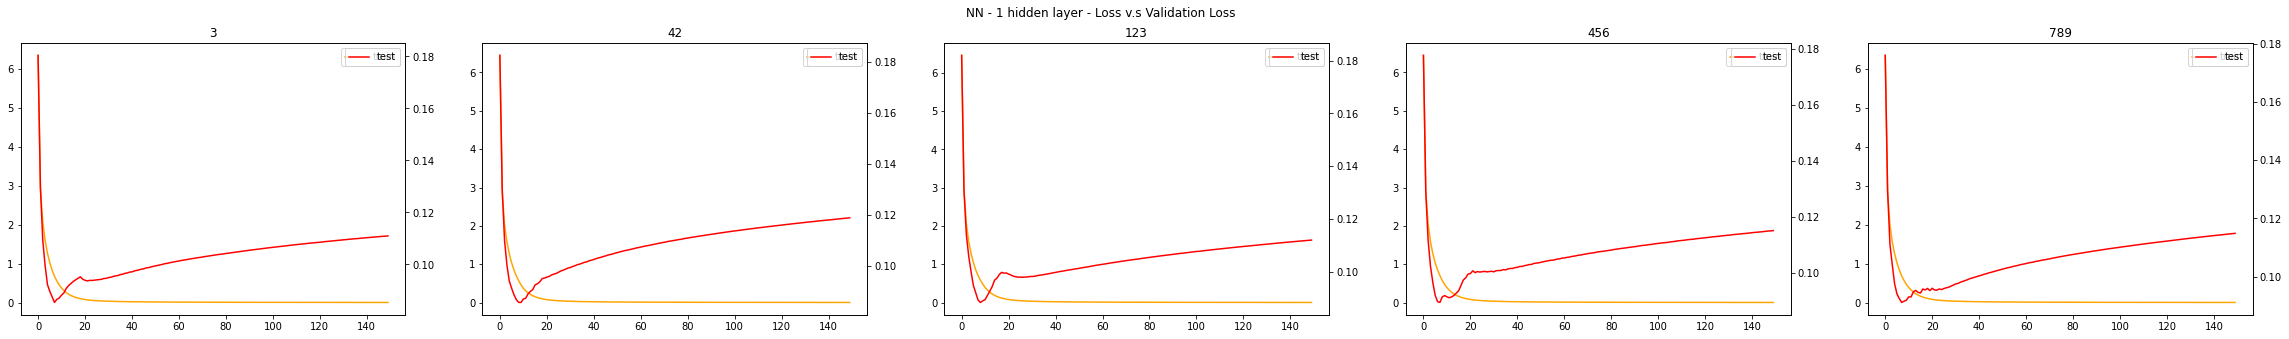

In [16]:
draw_path('NN - 1 hidden layer - Loss v.s Validation Loss',trial, 5, n_epochs, loss, v_loss)


## 3.(b)
We could implement an alternative performance measure to the cross entropy, the mean
miss-classification error.
Plot the classification error (in percentage) vs. number of epochs, for
both training and testing. Do you observe a different behavior compared to the behavior
of the cross-entropy error function?

A: The red line here is the loss of the validation set. The green and blue lines are the accuracies of the train and test set separately. 
Although the loss indicates there is the risk of overfitting, the accuracy stays steady after the turning point for both training and test set. This can be the advantage of using the cross-entropy criterion.

In my opinion, since the classification accuracy is a discretized result while the predictions are numerical, when overfitting starts, the probability the model gives out is being closer to the middle but not crossing the line. This will not influence the classification result. Thus, the loss will deteriorate worse than the accuracy.

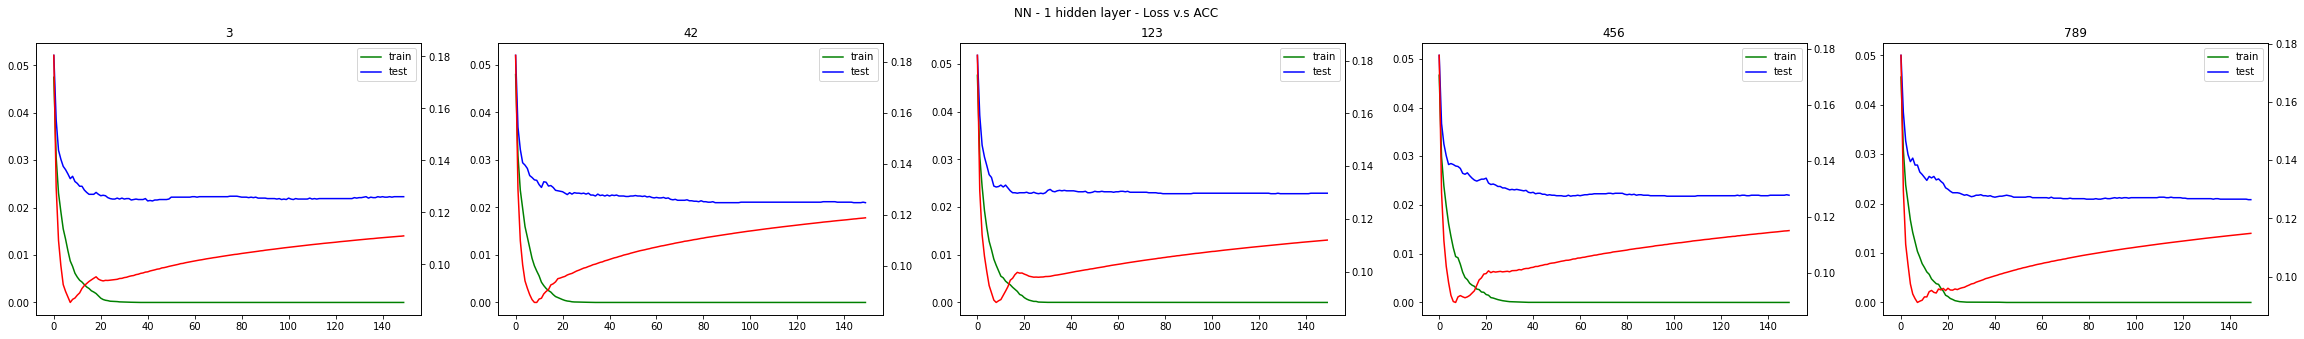

In [17]:
draw_path_entropy('NN - 1 hidden layer - Loss v.s ACC',trial, 5, n_epochs, v_loss,train_acc, test_acc)

## 3.(c)
Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

A: The model does learn some features. The centers of the figures show some blur patterns. However, there is an exception. But in NN, it will not influence the overall performance usually since there are so many neurons and layers.

[Linear(in_features=784, out_features=100, bias=True), Linear(in_features=100, out_features=10, bias=True)]


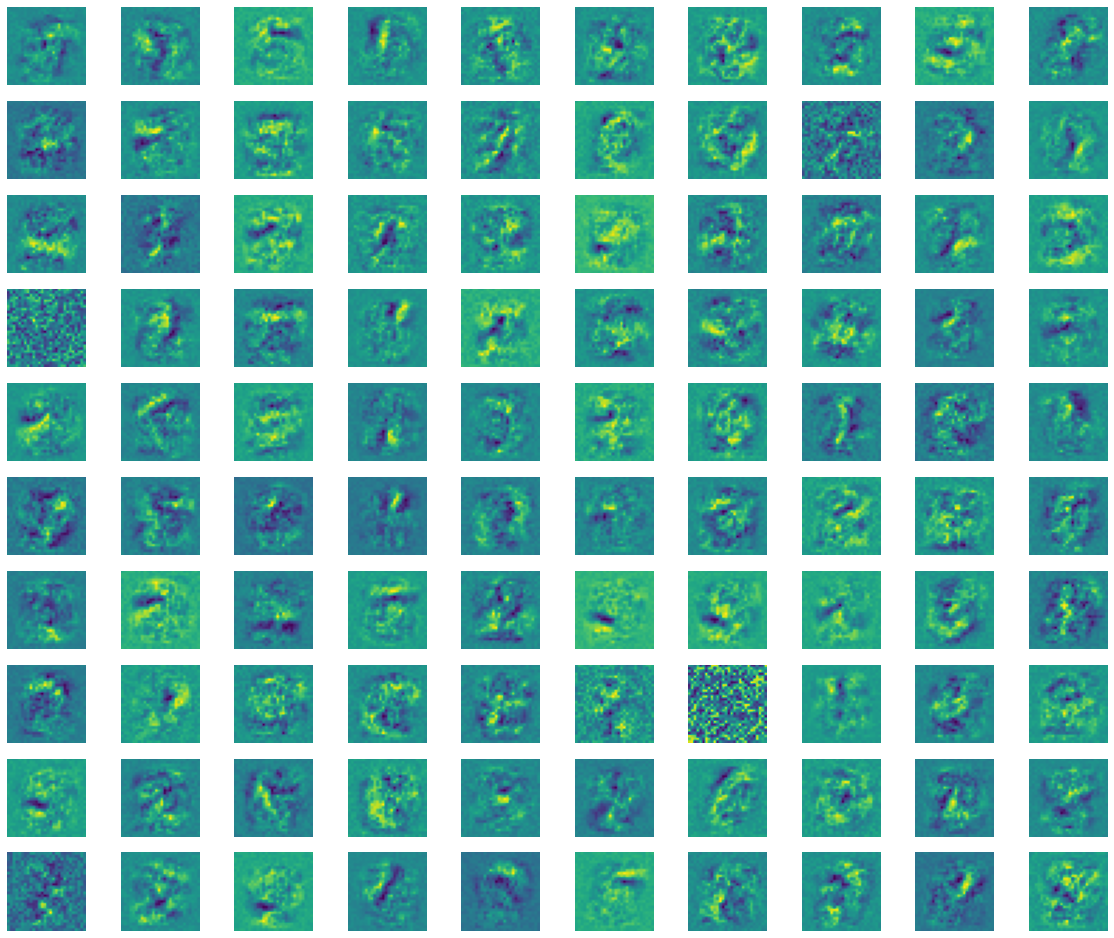

In [18]:
# Pick the best model
# model_best = torch.jit.load('modelNN1_234_model.pt')
model_best = torch.load('best_modelNN1.pt')
model_best.eval()
#list(model_best.children())
draw_learned_W(model_best)

## 3.(d)
Try different values of the learning rate. You should start with a learning rate of 0.1. You should then reduce it to .01, and increase it to 0.2 and 0.5. What happens to the convergence properties of the algorithm (looking at both average cross entropy and % incorrect)? Try momentum of 0.0, 0.5, 0.9. How does momentum affect convergence rate? How would you choose the best value of these parameters?

A: The learning rate and momentum are both influencial to the model performance.

When momentum = 0, the convergence properties will not be influenced by the learning rate we are trying. The model coverage no matter what while the minimums they settle in and the epochs they use to find the best model are a little bit different. 
However, when momentum ≠ 0, the convergence properties will be affected by the momentum and the learning rate. The higher the momentum, the more likely that the model will not converge. Also, the higher momentum will make the curve more fluctuant.

The best pair among all the parameter we are using is
lr = 0.01 and momen = 0.9

In [19]:
# model_1 = Net1()
# model_1 = model_1.to(device) 
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
# def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
for i in range(len(opti_groupsLR)):
    model_1 = Net1()
    model_1 = model_1.to(device)  
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed = 456, model = model_1, prefix = f'{prefix}_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)


New trial: 100%|██████████| 150/150 [46:45<00:00, 18.70s/it]


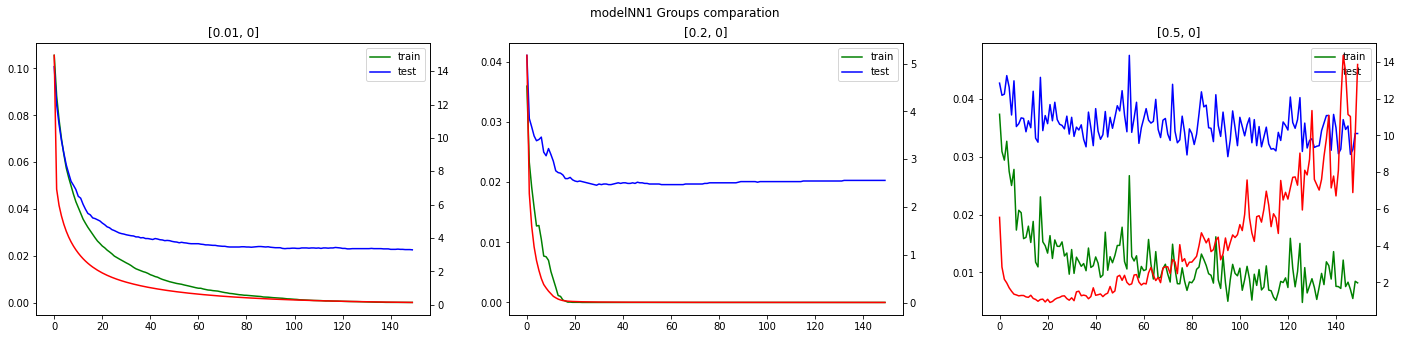

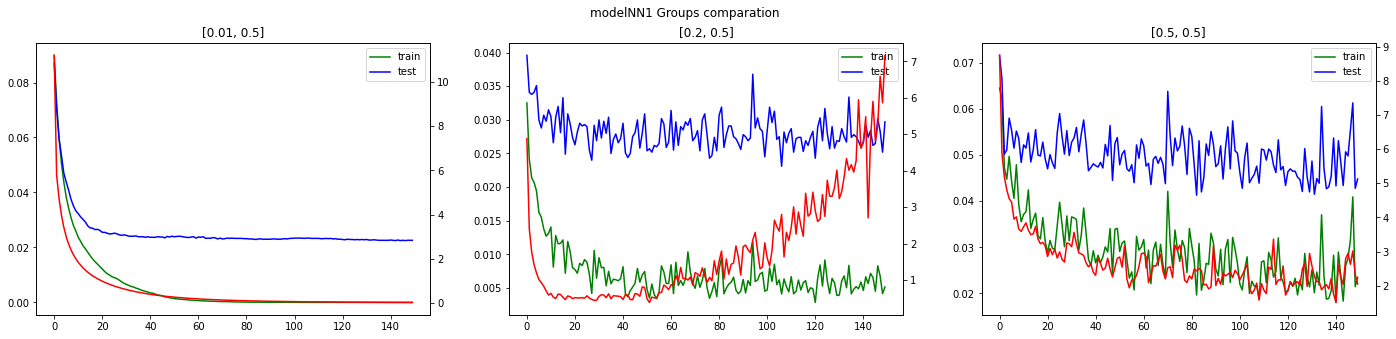

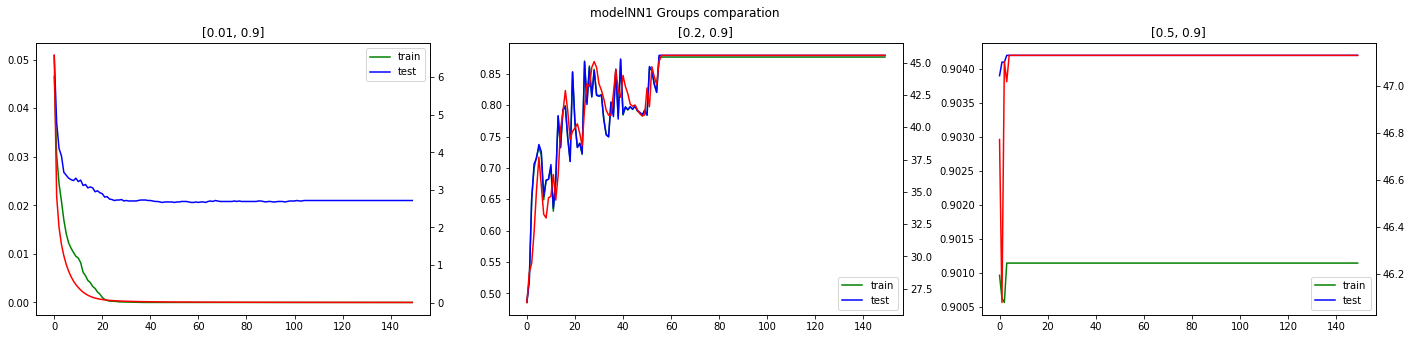

In [20]:
for i in range(3):
    draw_path_entropy(f'{prefix} Groups comparation',opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

## 4. 
Redo part 3(a) - 3(d) with a CNN i.e. with one 2-D convolutional layers → Relu activation → Maxpooling with appropriate hyperparameters. Compare the best result from the single layer neural network and the CNN, what could you conclude?

A: Convolutional layer set will increase the model performance but it will take a longer time to train. It also more likely to overfit. This is the "trade-off". We need to evaluate the resource we have and the desired accuracy we can achieve.

In [14]:
# Define the model2
# import libraries
# [20, 1, 28, 28]
# N -> the batch size
# C -> Nb of channels
# H -> Height
# W -> Width

# define the NN architecture
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()

        self.conv1 = nn.Conv2d(1,6,5, padding = 2)
        self.out = nn.Linear(6 * 14 * 14, 10)

    def forward(self, x):
        # flatten image input
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.out(x)

        return x


model_2 = Net2()
model_2 = model_2.to(device)
print(model_2)

Net2(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (out): Linear(in_features=1176, out_features=10, bias=True)
)


Step 1: Find the seed

In [22]:
prefix = 'modelCONV2'
loss, v_loss, train_acc, test_acc = [],[],[],[]

for seed in trial:
    model_2 = Net2()
    model_2 = model_2.to(device)
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed, model_2,prefix)
    if len(test_acc) == 0:
        best_model = model
    else:
        if test_acc[-1][-1] > test_ACC[-1]:
            best_model = model

    loss.append(LOSS)
    v_loss.append(V_LOSS)
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)

name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

New trial: 100%|██████████| 150/150 [49:46<00:00, 19.91s/it]


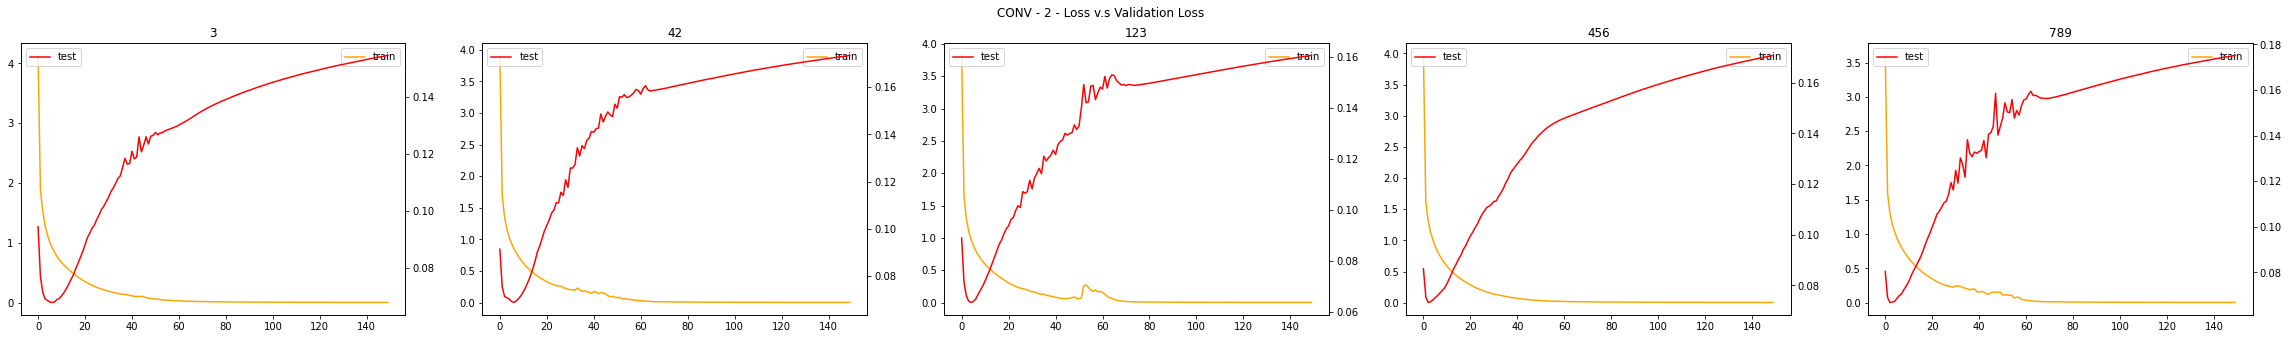

In [23]:
draw_path('CONV - 2 - Loss v.s Validation Loss',trial, 5, n_epochs, loss, v_loss)

Step 2: Multiple measurements

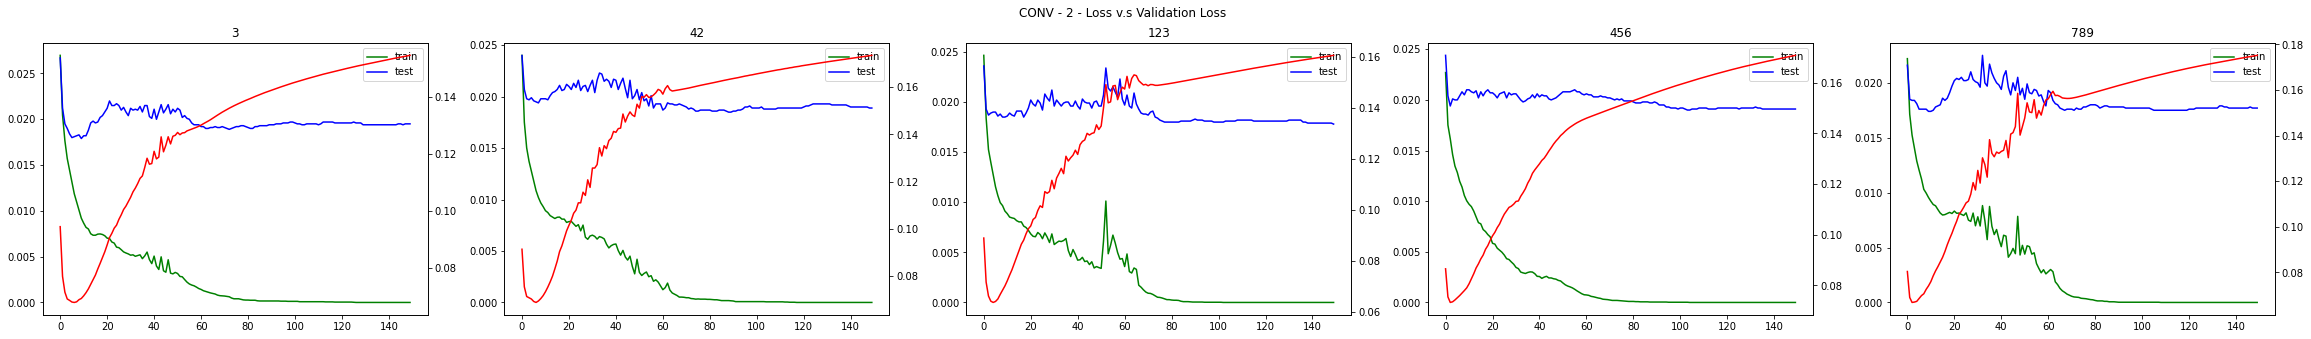

In [24]:
# draw_path('CONV - 2 - Loss v.s Validation Loss',trial, 5, n_epochs, loss_CONV2, v_loss_CONV2)
draw_path_entropy('CONV - 2 - Loss v.s Validation Loss',trial, 5, n_epochs, v_loss, train_acc, test_acc)

Step 3: Visualize your best results of the learned W

[Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)), Linear(in_features=1176, out_features=10, bias=True)]


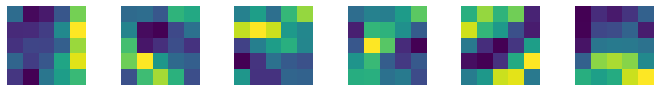

In [25]:
model_best_conv2 = torch.load('best_modelCONV2.pt')
model_best_conv2.eval()
draw_learned_W(model_best_conv2, width = 5, long = 5)

Step 4: Try different parameters

New trial: 100%|██████████| 150/150 [32:07<00:00, 12.85s/it]


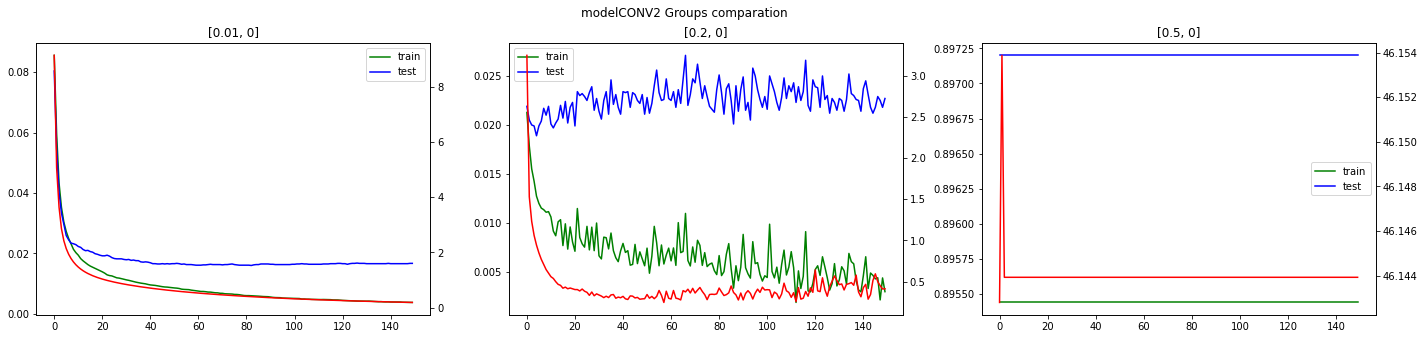

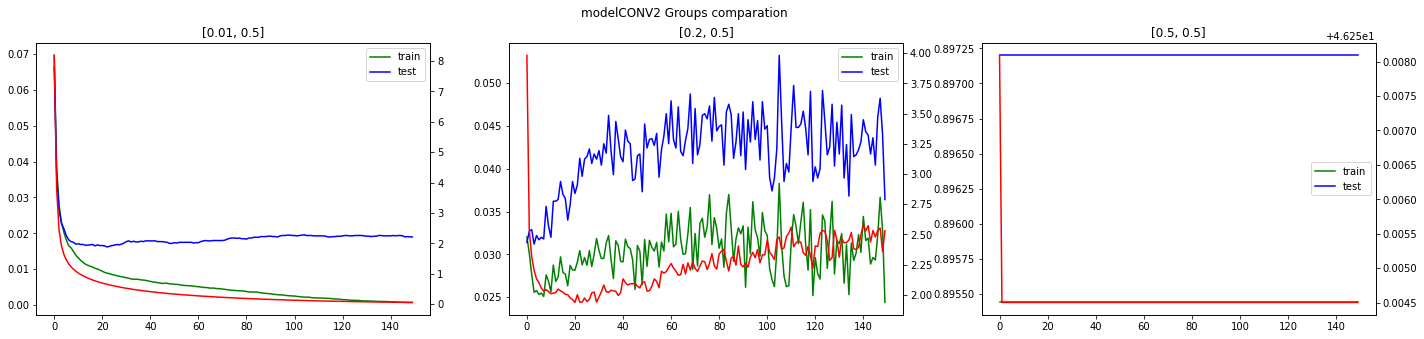

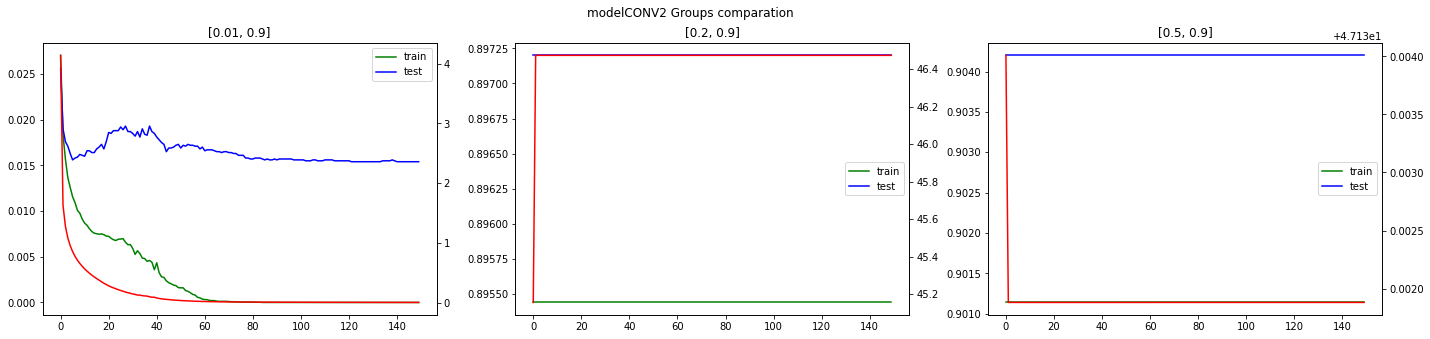

In [20]:
# model_1 = Net1()
# model_1 = model_1.to(device) 
seed = 789
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
# def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
for i in range(len(opti_groupsLR)):
    model_2 = Net2()
    model_2 = model_2.to(device)  
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed = seed, model = model_2, prefix = f'{prefix}_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)

for i in range(3):
    draw_path_entropy(f'{prefix} Groups comparation',opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

## 5. 
Redo part 3(a) - 3(d) with your favorite deep learning architecture (e.g., introducing batch normalization, introducing dropout in training) to beat the performance of SVM with Gaussian Kernel, i.e., to have a test error rate lower than 1.4%.

In [21]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels= 16, kernel_size= 5, stride=1, padding=0 )
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, stride= 1, padding= 2)
        self.batch1 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batch2 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batch3 = nn.BatchNorm2d(256)
        self.fc1  = nn.Linear(in_features= 2304, out_features= 512)
        self.fc2  = nn.Linear(in_features= 512, out_features= 128)
        self.fc3 = nn.Linear(in_features=128 , out_features=10)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = self.batch1(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x,2)
        x = self.batch2(x)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x,2)
        x = self.batch3(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_3 = Net3()
model_3 = model_3.to(device)
print(model_3)

Net3(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2304, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


Step 1: Find the seed

In [22]:
prefix = 'modelCONV3'
loss, v_loss, train_acc, test_acc = [],[],[],[]

for seed in trial:
    model_3 = Net3()
    model_3 = model_3.to(device)
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed, model_3,prefix)
    if len(test_acc) == 0:
        best_model = model
    else:
        if test_acc[-1][-1] > test_ACC[-1]:
            best_model = model

    loss.append(LOSS)
    v_loss.append(V_LOSS)
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)

name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

New trial: 100%|██████████| 150/150 [55:31<00:00, 22.21s/it]


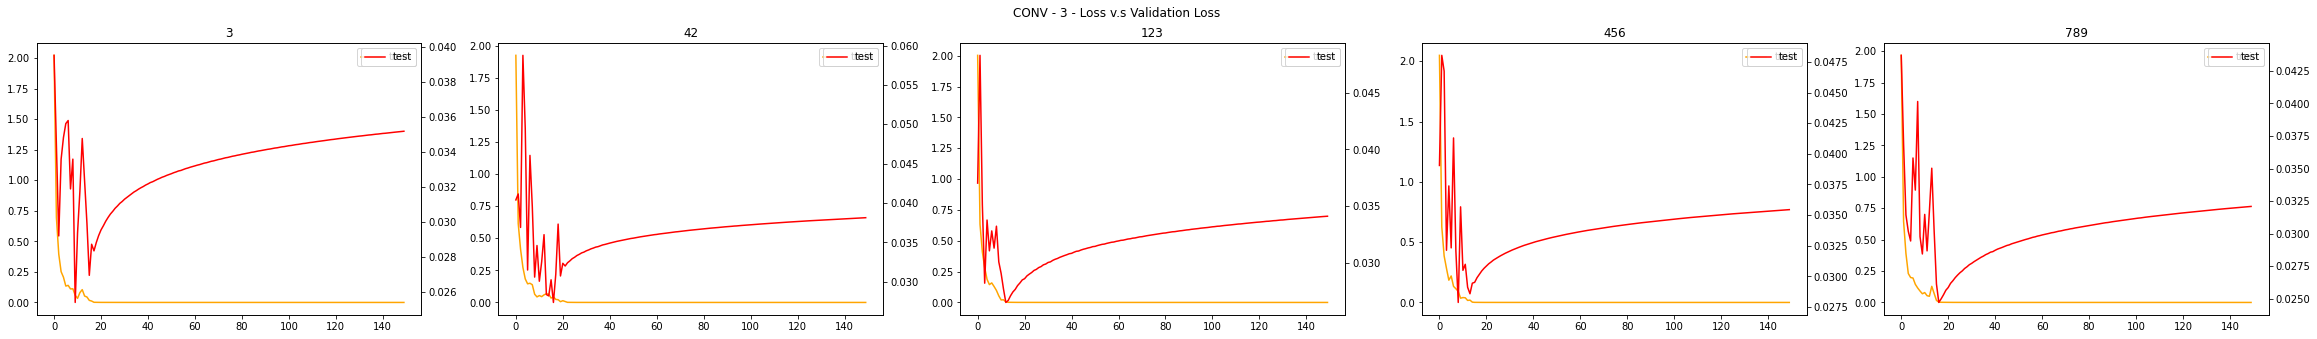

In [23]:
draw_path('CONV - 3 - Loss v.s Validation Loss',trial, 5, n_epochs, loss, v_loss)

Step 2: Multiple measurements

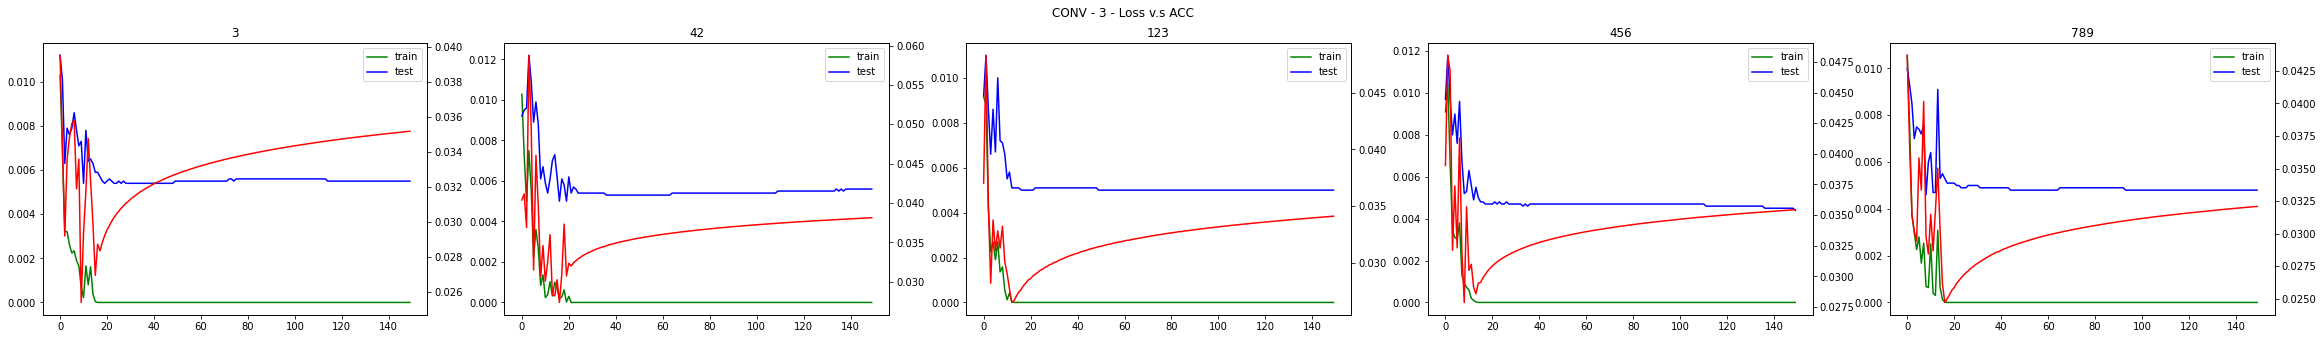

In [24]:
draw_path_entropy('CONV - 3 - Loss v.s ACC',trial, 5, n_epochs, v_loss, train_acc, test_acc)

Step 3: Visualize your best results of the learned W

Total convolutional layers: 5


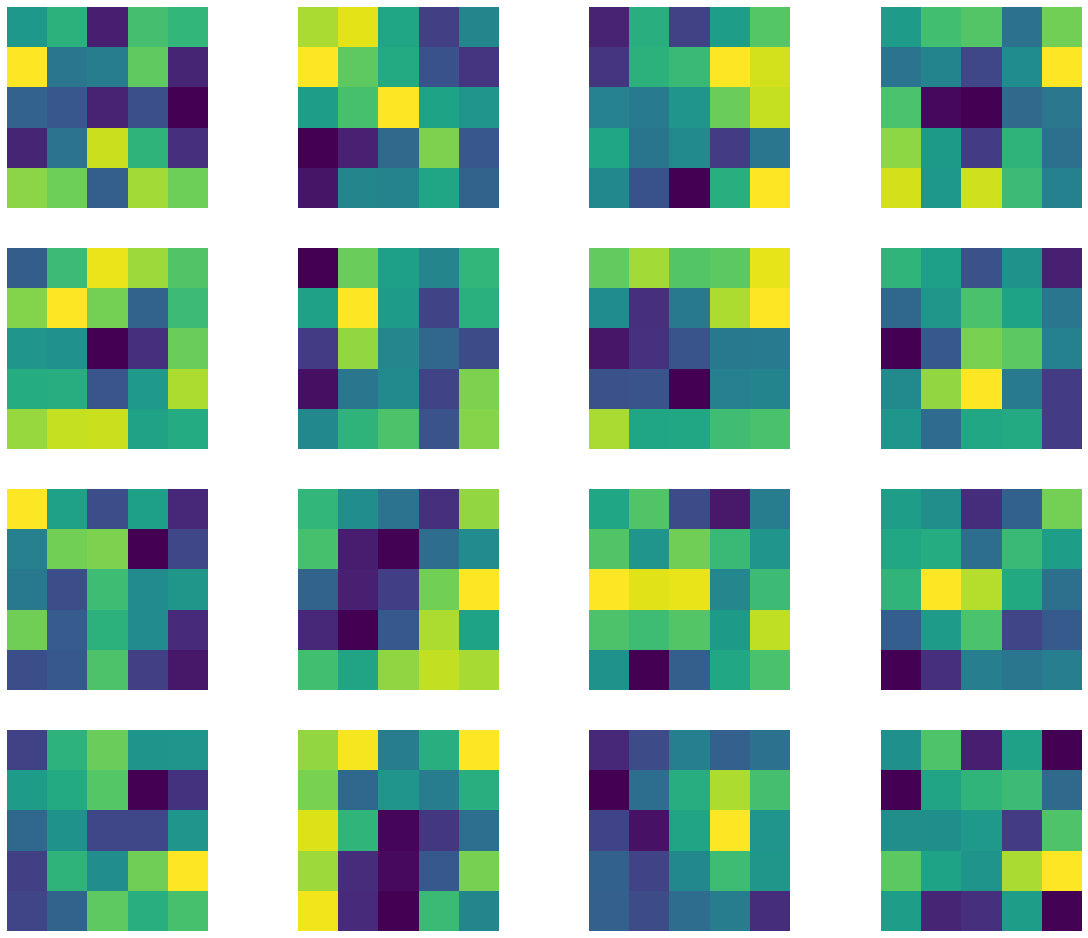

======= Conv filter 0 =======


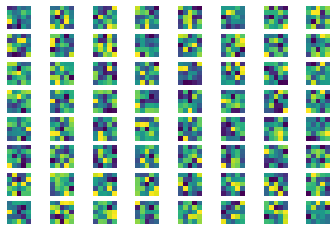

======= Conv filter 1 =======


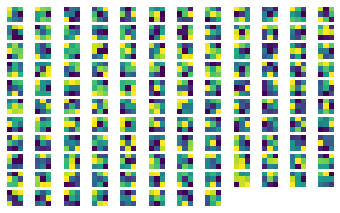

======= Conv filter 2 =======


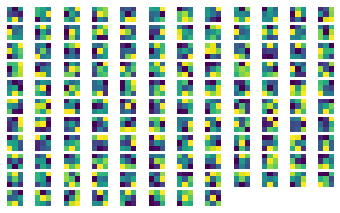

======= Conv filter 3 =======


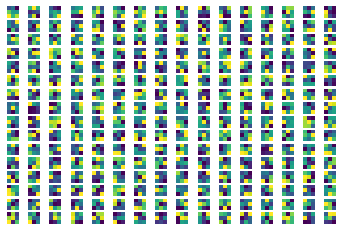

======= Conv filter 4 =======


In [25]:
model_best_conv3 = torch.load('best_modelCONV3.pt')
model_best_conv3.eval()
conv3_filters_weight = draw_conv_filter(model_best_conv3)

Step 4: Try different parameters

New trial: 100%|██████████| 150/150 [56:55<00:00, 22.77s/it]


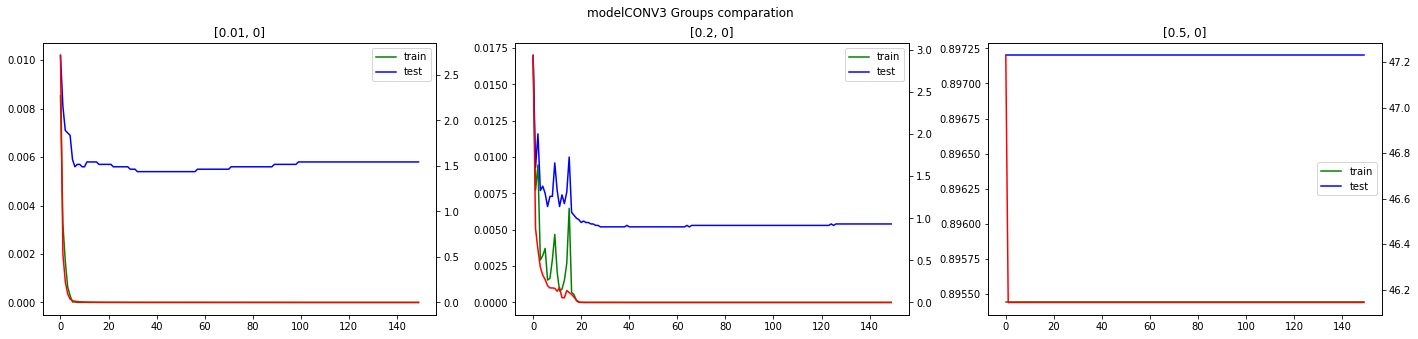

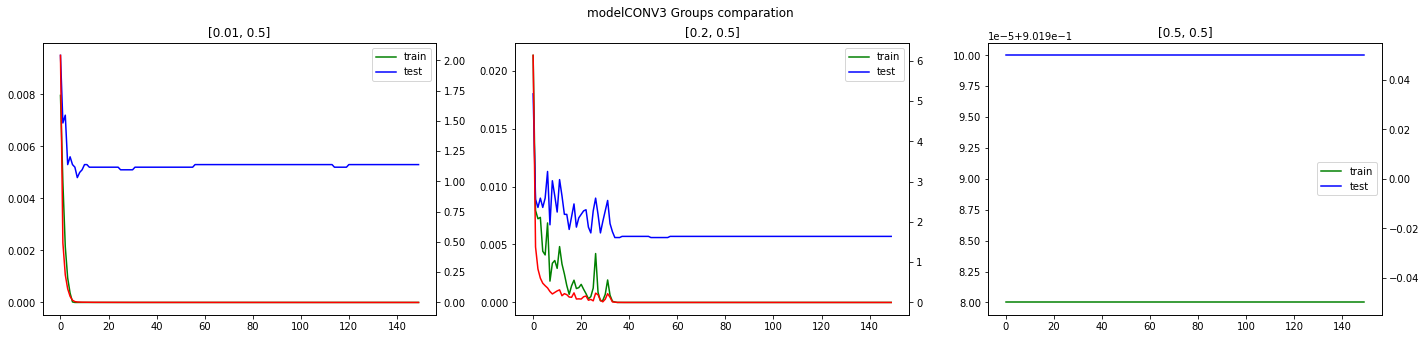

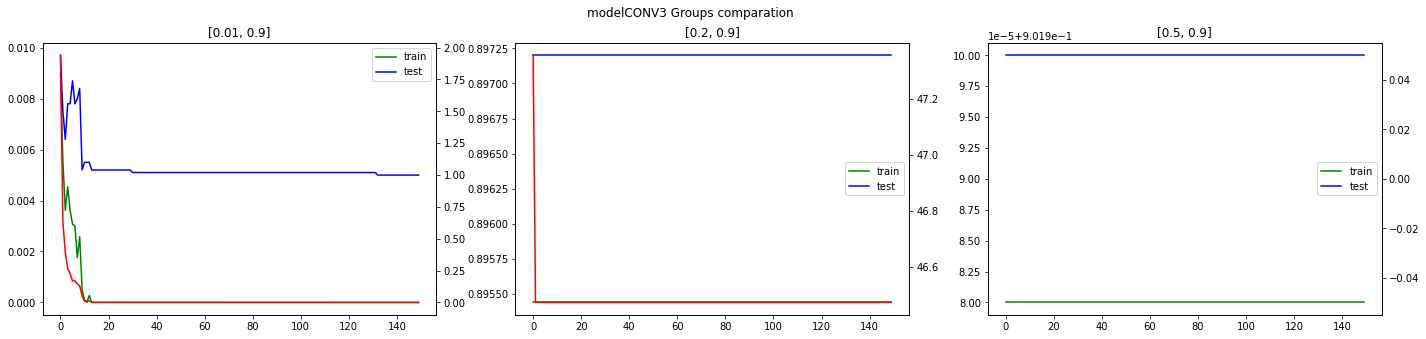

In [26]:
# model_1 = Net1()
# model_1 = model_1.to(device) 
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
# def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
for i in range(len(opti_groupsLR)):
    model_3 = Net3()
    model_3 = model_3.to(device)  
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed = 123, model = model_3, prefix = f'{prefix}_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)
    
for i in range(3):
    draw_path_entropy(f'{prefix} Groups comparation',opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

# 5.
In this part, you are working with train.txt, val.txt and test.txt. In particular, train.txt contains 20,000 lines and val.txt and test.txt contains 5000 lines in the same format. Each line contains 1569 coordinates, with the first 784 real-valued numbers correspond to the 784 pixel values for the first digit, next 784 real valued numbers correspond to the pixel values for the second digit.


In [27]:
train = np.genfromtxt('train.txt', delimiter=',', dtype="float64")
test = np.genfromtxt('test.txt', delimiter=',', dtype="float64")
validation = np.genfromtxt('val.txt', delimiter=',', dtype="float64")
train.shape, validation.shape, test.shape

((20000, 1569), (5000, 1569), (5000, 1569))

## 6. 
As a warm up question, load the data and plot a few examples. Decide if the pixels were scanned out in row-major or column-major order. What is the relationship between the 2 digits and the last coordinate of each line?

A: The sum of two digits equal to the last number in each line. They are scanned out in row-major.

Text(0.5, 1.0, '15.0')

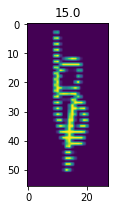

In [28]:
loc = train[np.random.randint(1,20000),:]
plt.figure(figsize=(3, 3))
plt.imshow(loc[:-1].reshape(56,28))
plt.title(loc[-1])


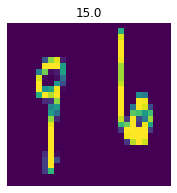

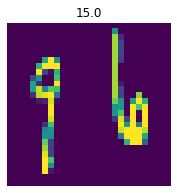

In [29]:
for res in range(2):
    #num1 = dig3[[i for i in range(len(dig3)) if i % 2 == res]]
    nums = loc[[i for i in range(len(loc[:-1])) if i % 2 == res]]
    plt.figure(figsize=(3, 3))
    plt.imshow(nums.reshape(28,28))
    plt.title(loc[-1])  
    _ = plt.axis("off")


## 7.
Repeat part 3(a) - 3(d) with at least two of your favorite deep learning architecture (e.g., introducing batch normalization, introducing dropout in training) with respect to with train.txt, val.txt and test.txt. In particular,
(a) Using train.txt to train your models.
(b) Using the validation error (i.e., the performance on val.txt) to select the best model.
(c) Report the generalization error (i.e., the performance on test.txt) for the model you picked. How would you compare the test errors you obtained with respect to the original MNIST data? Explain why you cannot obtain a test error lower than 1%.

A: There are more figures matching the same number. For example, we have three pictures representing each number. Since we are using the sum of numbers of two pictures to obtain the target, each target now is related to more than nine pics since there can be so many combinations to obtain the target value. This will make it much harder for computers to learn the pattern. To them, the features become more irregular.

### 7.1 Model I

In [30]:
TR = []
for j in range(len(train)):
    line = train[j]
    line1 = line[[i for i in range(len(train[j][:-1])) if i % 2 == 1]]
    #line2 = line[[i for i in range(len(train[j][:-1])) if i % 2 == 0]]
    TR.append(line1.reshape(1, 28,28))
TR = np.array(TR)

TEST = []
for j in range(len(test)):
    line = test[j]
    line1 = line[[i for i in range(len(test[j][:-1])) if i % 2 == 1]]
    #line2 = line[[i for i in range(test[j][:-1])) if i % 2 == 0]]
    TEST.append(line1.reshape(1, 28,28))
TEST = np.array(TEST)

VAL = []
for j in range(len(validation)):
    line = validation[j]
    line1 = line[[i for i in range(len(validation[j][:-1])) if i % 2 == 1]]
    #line2 = line[[i for i in range(test[j][:-1])) if i % 2 == 0]]
    VAL.append(line1.reshape(1, 28,28))
VAL = np.array(VAL)

In [31]:
TR.shape, TEST.shape, VAL.shape

((20000, 1, 28, 28), (5000, 1, 28, 28), (5000, 1, 28, 28))

In [32]:
np.max(train[:,-1]), np.max(test[:,-1]), np.max(validation[:,-1])

(18.0, 18.0, 18.0)

In [33]:
np.min(train[:,-1]), np.min(test[:,-1]), np.min(validation[:,-1])

(0.0, 0.0, 0.0)

In [34]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels= 16, kernel_size= 5, stride=1, padding=0 )
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, stride= 1, padding= 2)
        self.batch1 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batch2 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batch3 = nn.BatchNorm2d(256)
        self.fc1  = nn.Linear(in_features= 2304, out_features= 512)
        self.fc2  = nn.Linear(in_features= 512, out_features= 128)
        self.fc3 = nn.Linear(in_features=128 , out_features=19)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = self.batch1(x)
        #x = F.batch_norm(x, affine=None, running_var=None)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x,2)
        x = self.batch2(x)
        #x = F.batch_norm(x, running_mean=None, running_var=None)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x,2)
        x = self.batch3(x)
        #x = F.batch_norm(x, running_mean=None, running_var=None)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_4 = Net4()
model_4 = model_4.to(device)
# model.cuda()
print(model_4)

Net4(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2304, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=19, bias=True)
)


In [35]:
from torch.utils.data import DataLoader, TensorDataset

# create tensor dataset
train_data2 = TensorDataset(torch.from_numpy(TR), torch.from_numpy(train[:,-1]))
val_data2 = TensorDataset(torch.from_numpy(VAL), torch.from_numpy(validation[:,-1]))
test_data2 = TensorDataset(torch.from_numpy(TEST), torch.from_numpy(test[:,-1]))

batch_size = 20

# shuffle data
train_loader = DataLoader(train_data2, shuffle=True, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(val_data2, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data2, shuffle=True, batch_size=batch_size, drop_last=True)

Step 1: Find the seed

In [36]:
prefix = 'modelCONV4'
loss, v_loss, train_acc, test_acc = [],[],[],[]

for seed in trial:
    model_4 = Net4()
    model_4 = model_4.to(device)
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed, model_4,prefix)
    if len(test_acc) == 0:
        best_model = model
    else:
        if test_acc[-1][-1] > test_ACC[-1]:
            best_model = model

    loss.append(LOSS)
    v_loss.append(V_LOSS)
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)

name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

New trial: 100%|██████████| 150/150 [17:35<00:00,  7.03s/it]


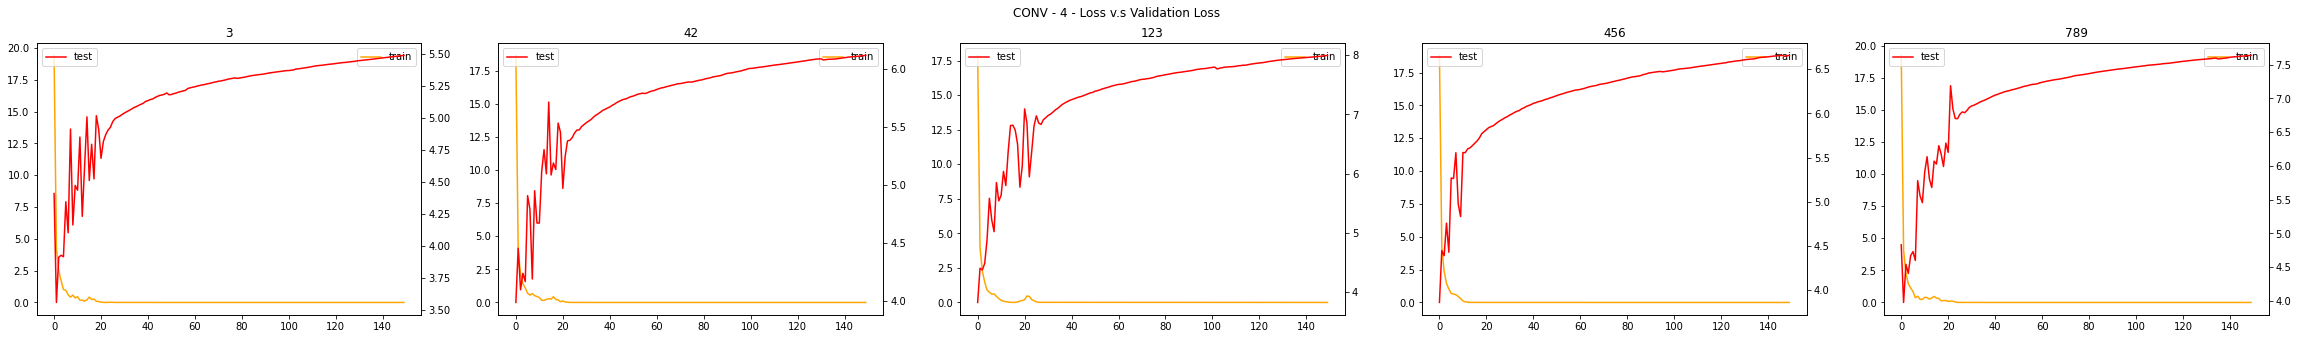

In [37]:
draw_path('CONV - 4 - Loss v.s Validation Loss', trial, 5, n_epochs, loss, v_loss)

Step 2: Multiple measurements

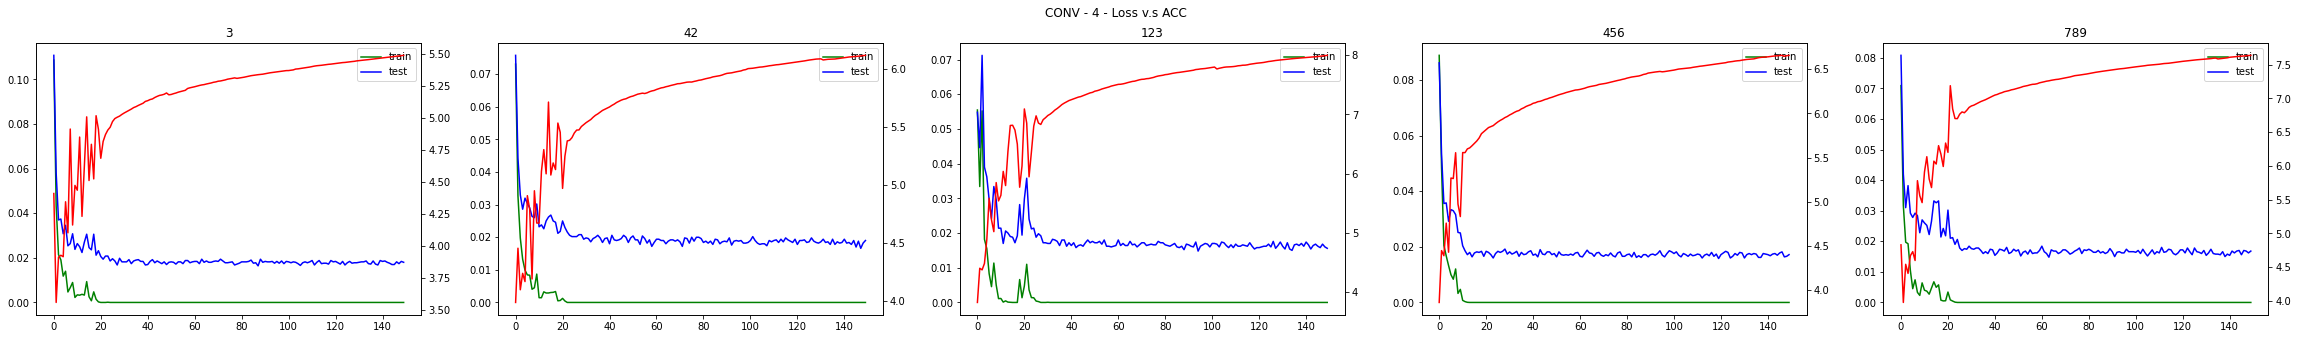

In [38]:
draw_path_entropy('CONV - 4 - Loss v.s ACC',trial, 5, n_epochs, v_loss, train_acc, test_acc)

Step 3: Visualize your best results of the learned W

Total convolutional layers: 5


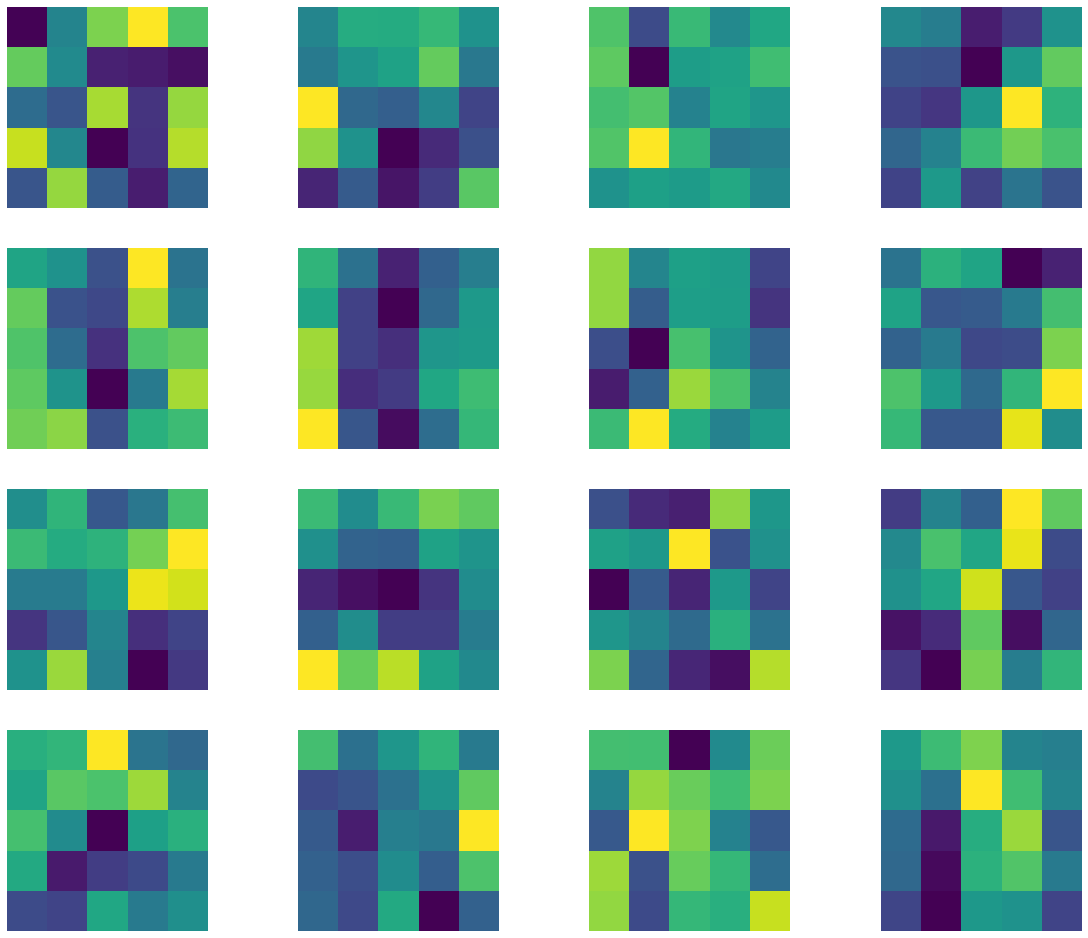

======= Conv filter 0 =======


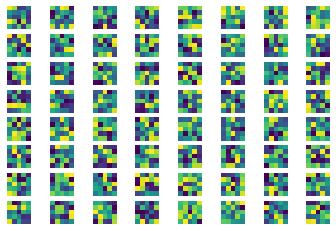

======= Conv filter 1 =======


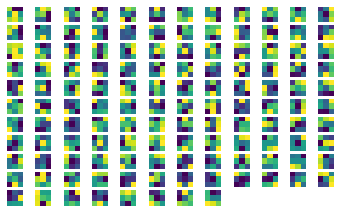

======= Conv filter 2 =======


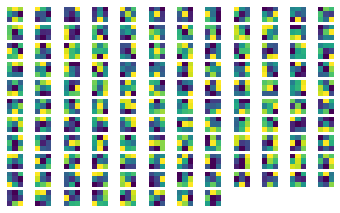

======= Conv filter 3 =======


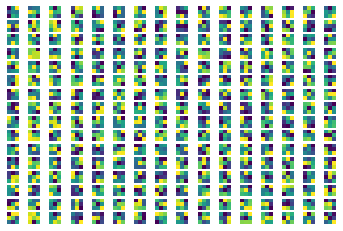

======= Conv filter 4 =======


In [39]:
model_best_conv4 = best_model #torch.load('best_modelCONV4.pt')
model_best_conv4.eval()
conv4_filters_weight = draw_conv_filter(model_best_conv4)

Step 4: Try different parameters

New trial: 100%|██████████| 150/150 [17:57<00:00,  7.18s/it]


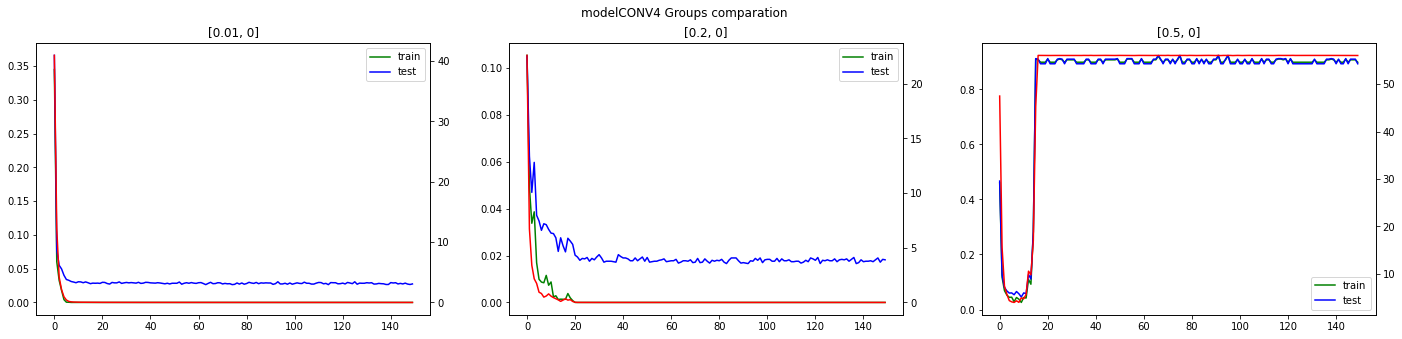

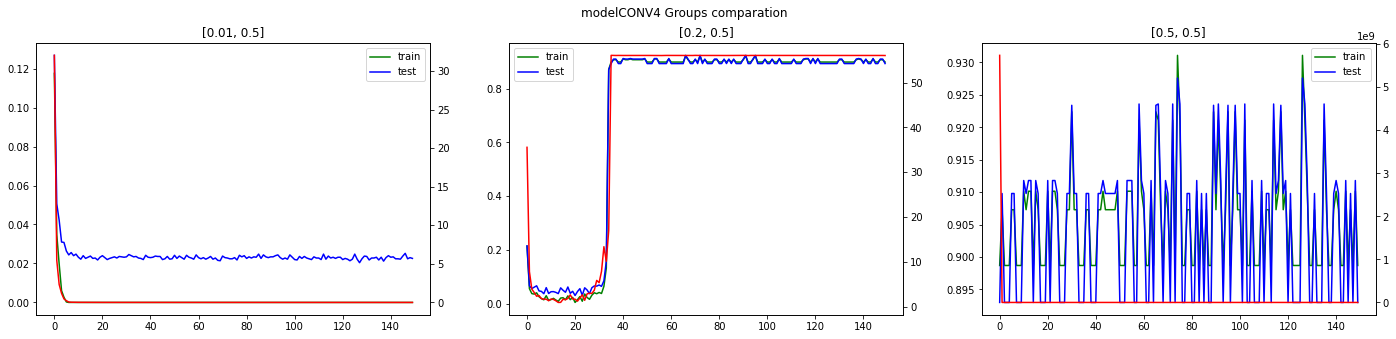

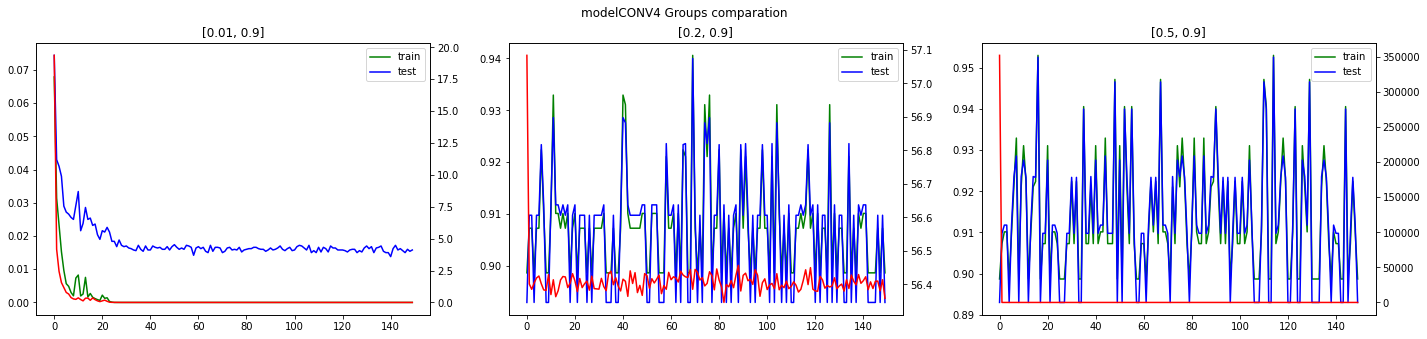

In [40]:
# model_1 = Net1()
# model_1 = model_1.to(device) 
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
# def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
for i in range(len(opti_groupsLR)):
    model_4 = Net4()
    model_4 = model_4.to(device)  
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed = 567, model = model_4, prefix = f'{prefix}_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)
    
for i in range(3):
    draw_path_entropy(f'{prefix} Groups comparation',opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

### 7.2 Model II

In [41]:
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels= 16, kernel_size= 5, stride=1, padding=0 )
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, stride= 1, padding= 2)
        self.batch1 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batch2 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batch3 = nn.BatchNorm2d(256)
        self.fc1  = nn.Linear(in_features= 2304, out_features= 512)
        self.fc2  = nn.Linear(in_features= 512, out_features= 128)
        self.fc3 = nn.Linear(in_features=128 , out_features=19)
        self.dropout = nn.Dropout(0.25)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = self.batch1(x)
        x = self.dropout(x)
        #x = F.batch_norm(x, affine=None, running_var=None)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x,2)
        x = self.batch2(x)
        x = self.dropout(x)
        #x = F.batch_norm(x, running_mean=None, running_var=None)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x,2)
        x = self.batch3(x)
        x = self.dropout(x)
        #x = F.batch_norm(x, running_mean=None, running_var=None)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_5 = Net5()
model_5 = model_5.to(device)
# model.cuda()
print(model_5)

Net5(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2304, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=19, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


Step 1: Find the seed

In [42]:
prefix = 'modelCONV5'
loss, v_loss, train_acc, test_acc = [],[],[],[]

for seed in trial:
    model_5 = Net5()
    model_5 = model_5.to(device)
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed, model_5,prefix)
    if len(test_acc) == 0:
        best_model = model
    else:
        if test_acc[-1][-1] > test_ACC[-1]:
            best_model = model

    loss.append(LOSS)
    v_loss.append(V_LOSS)
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)

name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

New trial: 100%|██████████| 150/150 [18:23<00:00,  7.35s/it]


In [ ]:
draw_path('CONV - 5 - Loss v.s Validation Loss',trial, 5, n_epochs, loss, v_loss)

Step 2: Multiple measurements

In [ ]:
draw_path_entropy('CONV - 5 - Loss v.s ACC',trial, 5, n_epochs, v_loss, train_acc, test_acc)

Step 3: Visualize your best results of the learned W

Total convolutional layers: 5


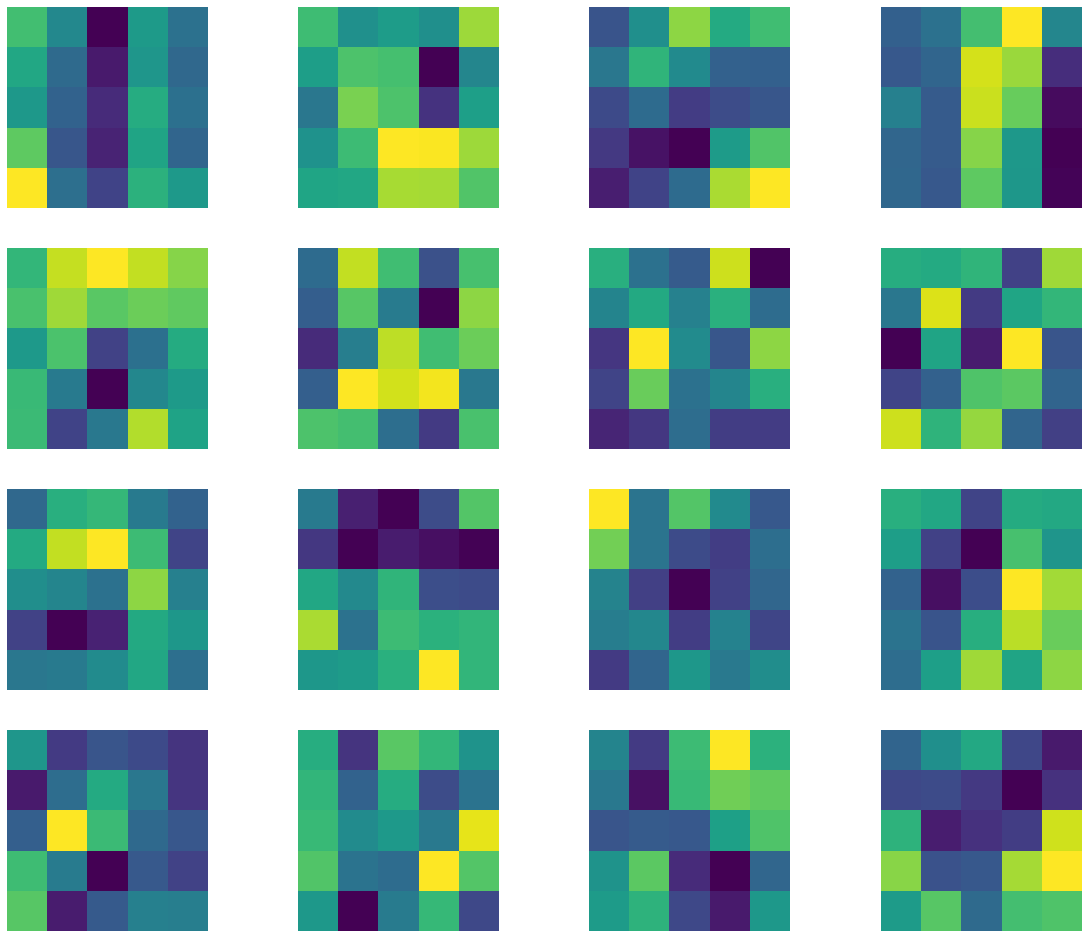

======= Conv filter 0 =======


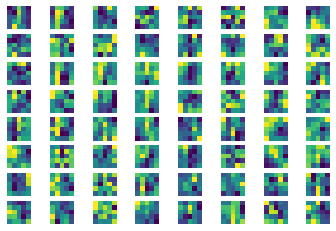

======= Conv filter 1 =======


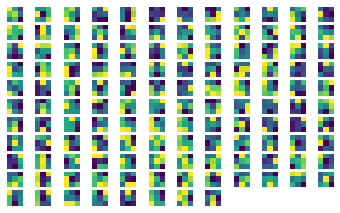

======= Conv filter 2 =======


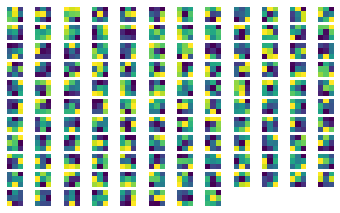

======= Conv filter 3 =======


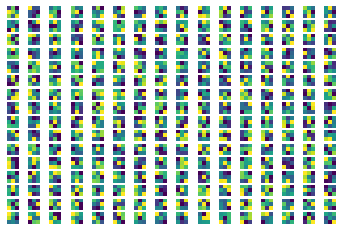

======= Conv filter 4 =======


In [45]:
model_best_conv5 = best_model #torch.load('best_newdata_modelCONV5.pt')
model_best_conv5.eval()
conv5_filters_weight = draw_conv_filter(model_best_conv5)

Step 4: Try different parameters

In [ ]:
# model_1 = Net1()
# model_1 = model_1.to(device) 
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
# def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
for i in range(len(opti_groupsLR)):
    model_5 = Net5()
    model_5 = model_5.to(device)  
    model, LOSS, V_LOSS, train_ACC, test_ACC = tt(seed = 456, model = model_5, prefix = f'{prefix}_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)
    
for i in range(3):
    draw_path_entropy(f'{prefix} Groups comparation',opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])